In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tables = ['ActionIn-one_hot-1-6-3.csv', 'ActionIn-sin-1-6-3.csv', 'ActionIn-sin-4-6-3.csv', 'DQN-one_hot-1-6-3.csv', 'DQN-sin-1-6-3.csv']

In [14]:
xp_array_dict = {}
for table in tables:
    xp_array_dict[table] = pd.read_csv(table, header=None)

In [25]:
print("Random agent is 0.38; naming convention: <agent_type>-<encoding>-<num_attn_head>-<num_labels>-<hand_size>.csv")

for k, score_array in xp_array_dict.items():
    print(k, 'sp', round(np.diagonal(score_array).mean(), 3), 'sde', round(np.diagonal(score_array).std() / np.sqrt(score_array.shape[0]), 2))

print("")

for k, score_array in xp_array_dict.items():
    off_diag_scores = np.ma.array(score_array, mask=False)
    off_diag_scores.mask[np.diag_indices(score_array.shape[0])] = True
    print(k, 'xp', round(off_diag_scores.mean(), 3), 'sde', round(off_diag_scores.std() / np.sqrt(off_diag_scores.shape[0] * (off_diag_scores.shape[0]-1) ), 3))

Random agent is 0.38; naming convention: <agent_type>-<encoding>-<num_attn_head>-<num_labels>-<hand_size>.csv
ActionIn-one_hot-1-6-3.csv sp 0.484 sde 0.01
ActionIn-sin-1-6-3.csv sp 0.515 sde 0.01
ActionIn-sin-4-6-3.csv sp 0.678 sde 0.01
DQN-one_hot-1-6-3.csv sp 0.818 sde 0.01
DQN-sin-1-6-3.csv sp 0.82 sde 0.01

ActionIn-one_hot-1-6-3.csv xp 0.489 sde 0.003
ActionIn-sin-1-6-3.csv xp 0.505 sde 0.003
ActionIn-sin-4-6-3.csv xp 0.693 sde 0.003
DQN-one_hot-1-6-3.csv xp 0.455 sde 0.011
DQN-sin-1-6-3.csv xp 0.432 sde 0.01


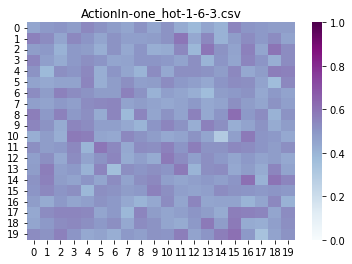

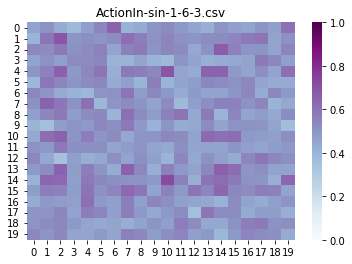

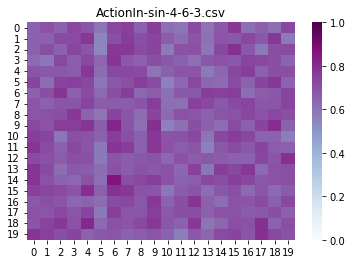

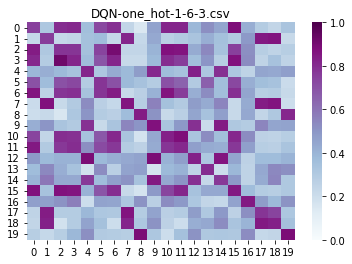

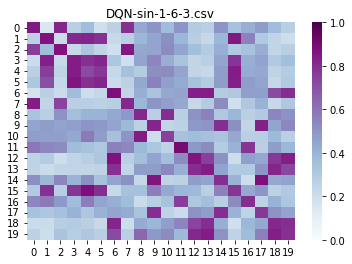

In [32]:
for k, score_array in xp_array_dict.items():
    sns.heatmap(score_array, cmap="BuPu", vmin=0, vmax=1)
    plt.title(k)
    plt.show()